In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd


In [2]:
df_income_cost = pd.read_excel('Sumrzd_data.xlsx', engine="openpyxl", sheet_name=None, index_col=0)

In [10]:
file_list_income = ['R98.xlsx' ,'R99.xlsx' ,'R1400.xlsx', 'R1401.xlsx' , 'U98.xlsx' , 'U99.xlsx' ,'U1400.xlsx', 'U1401.xlsx'] 

In [34]:
wcss = {}

for file_index, file_name in enumerate(file_list_income):
    wcss_temp = []
    for k in range(1, 21):
        X = df_income_cost[file_name]
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
        kmeans.fit(X)
        wcss_temp.append(kmeans.inertia_)
    wcss[file_name] = wcss_temp


In [35]:
wcss

{'R98.xlsx': [8.935375182626048e+20,
  4.619816779540637e+20,
  3.400033505915713e+20,
  2.6670507159135306e+20,
  2.2132702228723335e+20,
  1.860033005216168e+20,
  1.6255053258032628e+20,
  1.435132554374625e+20,
  1.2620822054873e+20,
  1.1341511472070466e+20,
  1.0212484487938132e+20,
  9.293297056156665e+19,
  8.501893168829178e+19,
  7.909704977788794e+19,
  7.305621404934647e+19,
  6.7408484620253815e+19,
  6.369070630784696e+19,
  5.97024887363554e+19,
  5.602842848115928e+19,
  5.286820071780537e+19],
 'R99.xlsx': [2.0439619204872505e+21,
  1.074125034614963e+21,
  7.824667788922707e+20,
  6.236239443783825e+20,
  5.111536521111589e+20,
  4.108812301948771e+20,
  3.537094742503986e+20,
  3.01093180838096e+20,
  2.6564386612074267e+20,
  2.4024692285611442e+20,
  2.182858368050148e+20,
  1.9889860544279668e+20,
  1.8303219338301882e+20,
  1.6844693627403334e+20,
  1.5485690703757148e+20,
  1.4271979180506051e+20,
  1.317040080094166e+20,
  1.235610888176071e+20,
  1.16107533683

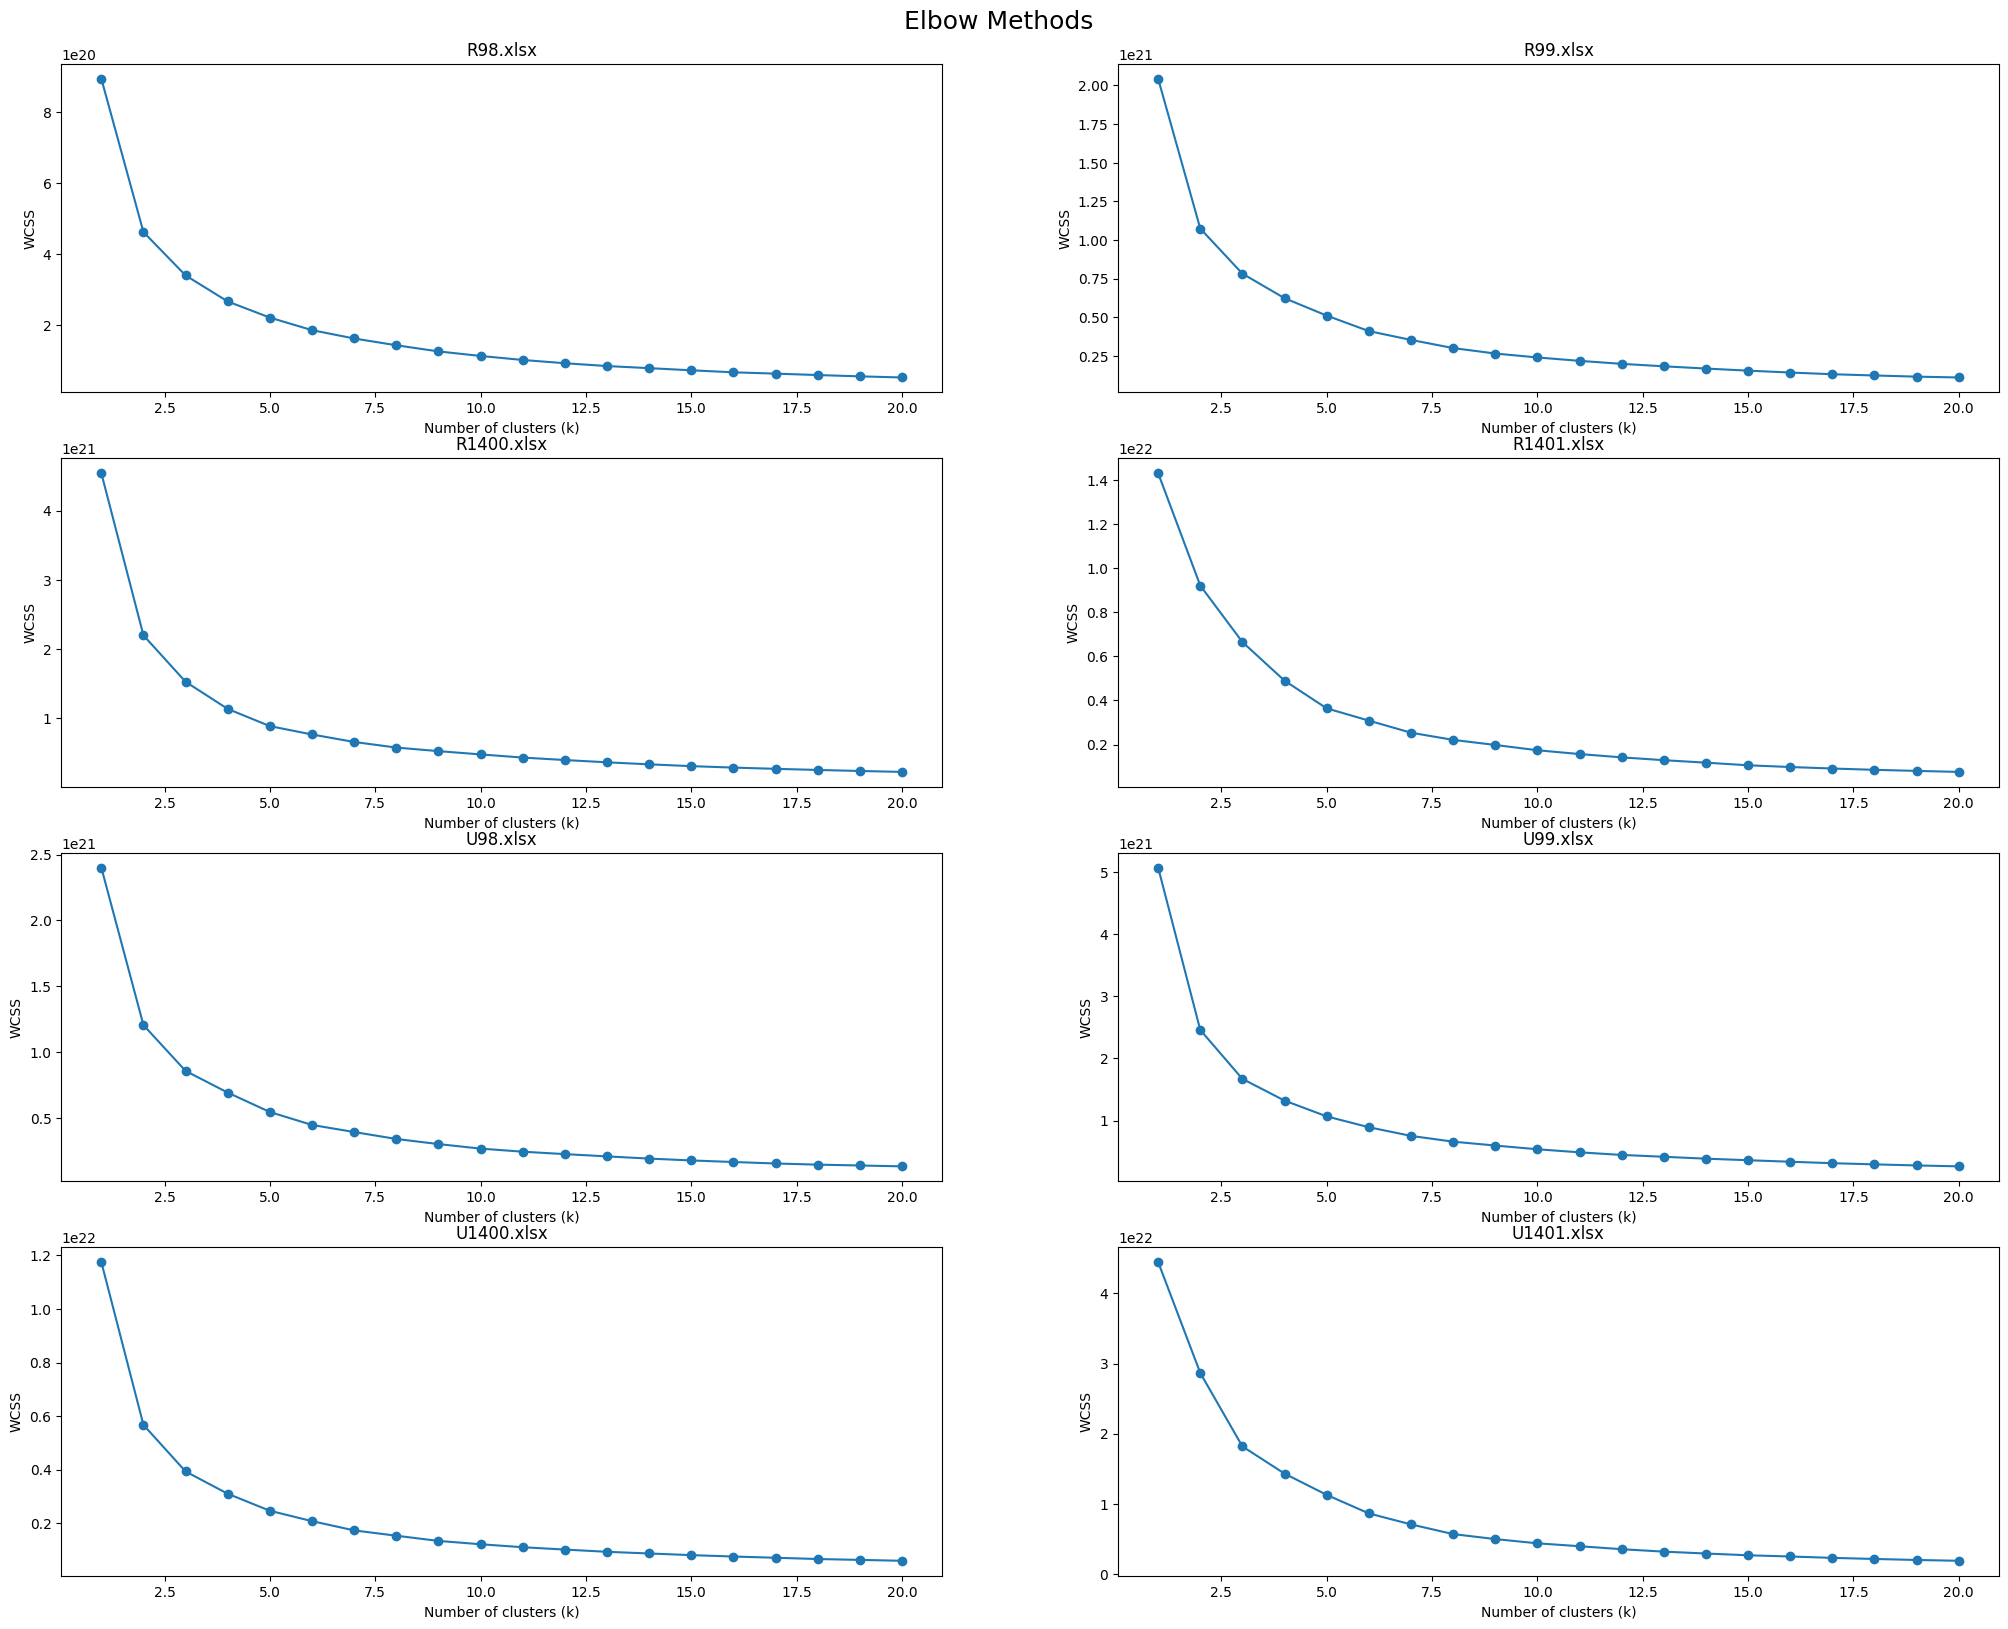

In [47]:
fig, axes = plt.subplots(4, 2, figsize=(25, 18))  
axes = axes.flatten()

for file_index, file_name in enumerate(file_list_income):
    axes[file_index].plot(range(1, 21), wcss[file_name], marker='o')
    axes[file_index].set_xlabel('Number of clusters (k)')
    axes[file_index].set_ylabel('WCSS')
    axes[file_index].set_title(file_name)


plt.subplots_adjust(top=0.95)
plt.suptitle('Elbow Methods', fontsize=18)

plt.show()

In [43]:
for file_index, file_name in enumerate(file_list_income):
    print('*'*16)
    print(file_name)
    print('*'*16)

    for k in range(2, 6):
        X = df_income_cost[file_name]
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
        kmeans.fit(X)
        labels = kmeans.labels_
        score = silhouette_score(X, labels)
        print("for k =", k, "score:", score)

****************
R98.xlsx
****************
for k = 2 score: 0.6188337437003278
for k = 3 score: 0.5463901214984482
for k = 4 score: 0.5556176613057345
for k = 5 score: 0.4771362599718549
****************
R99.xlsx
****************
for k = 2 score: 0.6212660805146254
for k = 3 score: 0.5617884384519419
for k = 4 score: 0.5651989396976781
for k = 5 score: 0.5206689455944354
****************
R1400.xlsx
****************
for k = 2 score: 0.6179470034179483
for k = 3 score: 0.5468997547778328
for k = 4 score: 0.5580243676370814
for k = 5 score: 0.5085916124500703
****************
R1401.xlsx
****************
for k = 2 score: 0.5837901717646623
for k = 3 score: 0.5810712381070106
for k = 4 score: 0.5913051455456839
for k = 5 score: 0.5319247165834889
****************
U98.xlsx
****************
for k = 2 score: 0.5809647282659504
for k = 3 score: 0.4958189611749212
for k = 4 score: 0.45560719328443483
for k = 5 score: 0.47255595572917947
****************
U99.xlsx
****************
for k = 2 score: